# Welcome to the Initial Exercise book of this Stock Trader's Almanac Financial Data Analysis Series.

<p>In this notebook, we will feature a number of data cleaning and wrangling operations that are typical in the fields of Data Science/Analysis. Most of these operations will be familiar to the average data science enthusiast, with the emphasis on financial data being the primary differentiator. Concepts and activities explored will include importing and cleaning of financial data, filtering (or data slicing) operations, data display operations, ploting operations, and so on.<b></p>

<p>As an added benefit, emphasis will be placed on examining real world problems and applications. We hope you find the series both engaging and illuminating.</p> 




# Exercise 1: Analyzing Tom Lee's Assertions about the profitability of going long equities whenever the VIX > 50. (April 17-2025)

## Brief Introduction to Tom Lee:
<br>
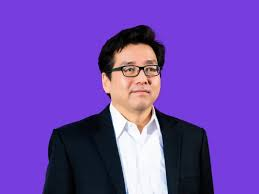
<p>Thomas J. Lee, CFA <br>   
Co-Founder, Head of Research Fundstrat Global Advisors<br>   
CIO and Portfolio Manager, Frundstrat Capital<br></p>   


<p>                                          
Thomas Lee is a Managing Partner and the Head of Research at Fundstrat Global Advisors. He is an accomplished Wall Street strategist with over 25 years of experience in equity research and has been top-ranked by Institutional Investor every year since 1998. He is regularly featured on CNBC as a market analyst and commentator. Prior to co-founding Fundstrat, he served as J.P. Morgan’s Chief Equity Strategist from 2007 to 2014, and previously as Managing Director at Salomon Smith Barney. His areas of expertise include Market Strategy, Small/Mid-Cap Strategy, and Telecom Services. Mr. Lee received his BSE from the Wharton School at the University of Pennsylvania with concentrations in Finance and Accounting. He is a CFA charterholder and is an active member of NYSSA and the NY Economic Club.</p>
    
## Exercise Background:

<p>On April 17, 2025, Tom lee released a brief market recap on the Fundstrat YouTube Channel. In it he quickly reviewed his correct call of the V-shaped US market recovery following the Trump Administration's "Liberation Day" (April 2nd, 2025) Tariff anouncements. The S&P had fallen over 20% since its highs of aproximately 6155 points on February 19<sup>th</sup> of the same year. It made its bottom on April 07<sup>th</sup>, 2025.  Similarly the NASDAQ had fallen about 25% over the same period <br></p>

<p>For our purposes, we will be examining Tom's assetion that the April 07-10<sup>th</sup> VIX highs of 60.13, 57.52, 57.96, & 54.87 represented a profitable buying opportunity in US equities. More to the point, we will be testing "[the] old [Wall Street] adage, you buy stocks when the VIX goes above 50, and good things will start to happen when it drops below 30," as explained in the video. For the sake of simplicity, we will be using the S&P 500 as a proxy for US equitities in our examinations.<br></p> 

<p>A link to the original Youtube video is provided below<b></p>

[Click here to watch the video on YouTube](https://youtu.be/C15d8f3sUMw?si=h5LDmJzHssZiVFJV)

Below is a screenshot 04:15 into the video where Tom starts examining the adage that when the VIX is over 50, its usually a good time to go long.<br> 

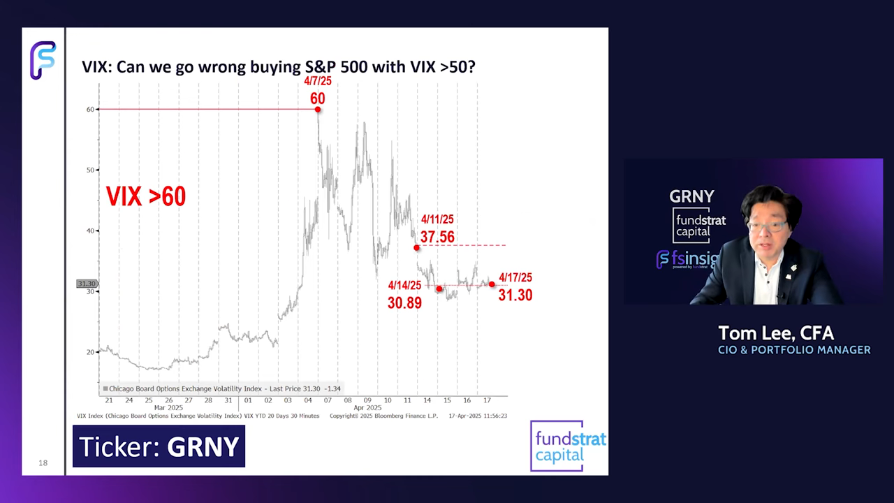<br>

[Click here to watch the video at 04:15, where Tom starts examining the VIX>50 Adage](https://youtu.be/C15d8f3sUMw?si=K6hKHHukR-rspHj1&t=240)

### Exercise Goals:

1. Run a python query covering the last 10 years for every instance the VIX crossed above 50
2. Then create a dataframe examining the 5 day, 10 day, 30 day, 60 day, & 90 day returns if we had gone long the S&P after that instance
3. Display this data graphical in an easily understandable format.
   







In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# 1. Define the ticker symbol for VIX
ticker = "^VIX"

# 2. Calculate the date 10 years ago from today
end_date = datetime.today()
start_date = end_date - timedelta(days=10*365)

# 3. Download historical data for VIX
vix_data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
print('\n', vix_data.head)

# 4. The columns in yfinance downloaded data are often multi-indexed. In our situation, the column names have a level 1 index which is High, Low, close, etc, and then a level 2 index which is the
#  the ticker name. As such, each column name is denoted by a tuple, e.g. ('High', '^VIX'), which is a (Price, Ticker) naming convention.

column_names_index = vix_data.columns
print('\n', column_names_index)
print('\n', vix_data.head)

# 5. Filter for days where the closing price was above 50. Note how we adjust the column name when slicing the dataframe to reflect the multi-Index naming convention described in Section 4.
vix_above_50 = vix_data[vix_data[('High', '^VIX')] > 50]

# 6. Print The filtered DataFrame
print(vix_above_50.High.describe())
print('\n', vix_above_50)

# # Optionally save the filtered data to a CSV file
# vix_above_50.to_csv("vix_above_50.csv")


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^VIX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')



 <bound method NDFrame.head of Empty DataFrame
Columns: [(Adj Close, ^VIX), (Close, ^VIX), (High, ^VIX), (Low, ^VIX), (Open, ^VIX), (Volume, ^VIX)]
Index: []>

 MultiIndex([('Adj Close', '^VIX'),
            (    'Close', '^VIX'),
            (     'High', '^VIX'),
            (      'Low', '^VIX'),
            (     'Open', '^VIX'),
            (   'Volume', '^VIX')],
           names=['Price', 'Ticker'])

 <bound method NDFrame.head of Empty DataFrame
Columns: [(Adj Close, ^VIX), (Close, ^VIX), (High, ^VIX), (Low, ^VIX), (Open, ^VIX), (Volume, ^VIX)]
Index: []>
Ticker  ^VIX
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN

 Empty DataFrame
Columns: [(Adj Close, ^VIX), (Close, ^VIX), (High, ^VIX), (Low, ^VIX), (Open, ^VIX), (Volume, ^VIX)]
Index: []
